# non-parametric models

## decision trees

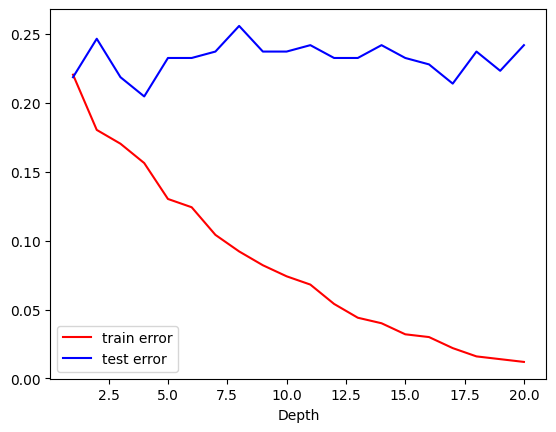

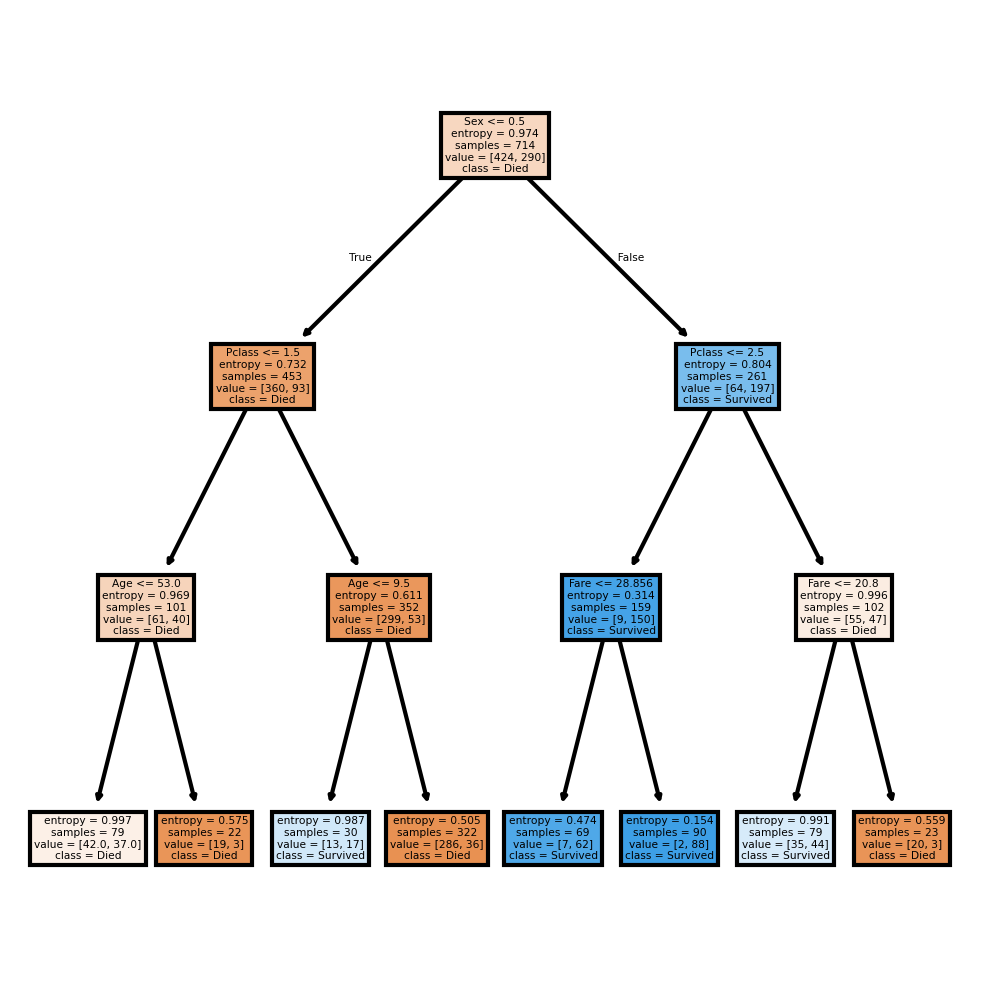

In [5]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]

df = df.drop(cols_to_drop, axis=1)

df = df.dropna()

df.Sex = df.Sex.map(lambda x: 0 if x=='male' else 1)

fnames = df.columns[1:].to_list()            # feature names
tname = df.columns[0]                        # target name

X = df.iloc[:, 1:].to_numpy()
y = df.iloc[:, 0].to_numpy()

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, shuffle=True)

from sklearn.metrics import accuracy_score, log_loss
N = 20
train_errs = np.empty(N)
test_errs = np.empty(N)

for d in range(N):
    model = DecisionTreeClassifier(max_depth=d+1, criterion='entropy')
    model.fit(Xtrain, ytrain)

    train_errs[d] = 1-accuracy_score(ytrain, model.predict(Xtrain))
    test_errs[d] = 1-accuracy_score(ytest, model.predict(Xtest))

ds = np.linspace(1,N, N)
plt.plot(ds, train_errs, color='red', label='train error')
plt.plot(ds, test_errs, color='blue', label='test error')
plt.xlabel("Depth")
plt.legend() 
plt.show()

model = DecisionTreeClassifier(max_depth=3, criterion='entropy').fit(X, y)
fig, axes = plt.subplots(1, 1, figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names=fnames, class_names=['Died', 'Survived'], filled=True)
plt.show()

## knn

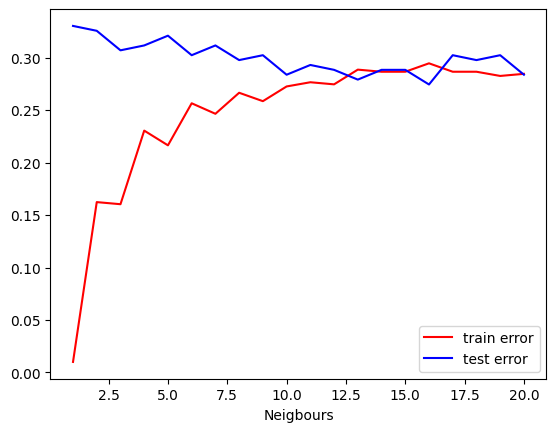

In [9]:
from sklearn.neighbors import KNeighborsClassifier
N = 20
train_errs = np.empty(N)
test_errs = np.empty(N)

for d in range(N):
    model = KNeighborsClassifier(n_neighbors=d+1, p=2)
    model.fit(Xtrain, ytrain)

    train_errs[d] = 1-accuracy_score(ytrain, model.predict(Xtrain))
    test_errs[d] = 1-accuracy_score(ytest, model.predict(Xtest))

ds = np.linspace(1,N, N)
plt.plot(ds, train_errs, color='red', label='train error')
plt.plot(ds, test_errs, color='blue', label='test error')
plt.xlabel("Neigbours")
plt.legend() 
plt.show()